In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [198]:
bank_cust = pd.read_csv('bank_transactions.csv')
bank_cust.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [199]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [200]:
bank_cust.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [201]:
bank_cust.shape

(1048567, 9)

### Exploratory Data Analysis

In [202]:
bank_eda = bank_cust.copy()
# Any duplicated values?
bank_eda.duplicated().sum()

0

In [203]:
# Any NULL values?
null_values = bank_eda.isnull().sum()
null_values

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [204]:
null_values.values

array([   0,    0, 3397, 1100,  151, 2369,    0,    0,    0], dtype=int64)

In [205]:
null_percentage = (null_values / len(bank_eda)) * 100
null_percentage

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

In [206]:
null_percentage[1]

0.0

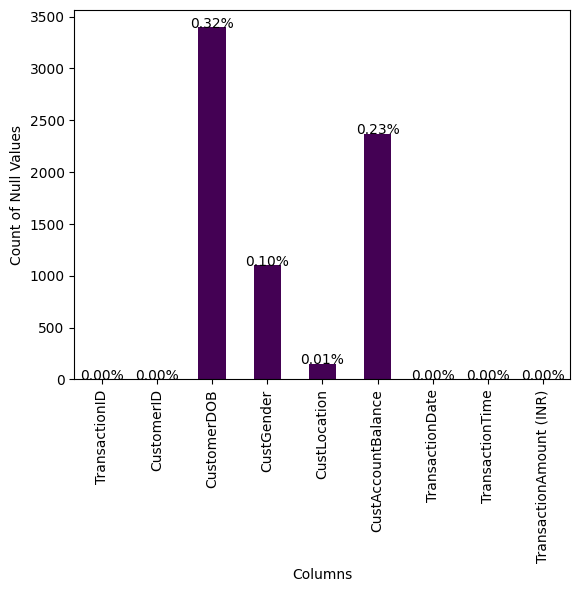

In [207]:
# Plotting the bar chart
ax = null_values.plot(kind='bar', cmap='viridis')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
# Adding text annotations for percentage on top of each bar
for i, v in enumerate(null_values):
    ax.text(i, v + 0.5, f"{null_percentage[i]:.2f}%", ha='center')

plt.show()

The dataset consists of various attributes related to transactions and customer information. Most columns have complete data, with no missing values observed for TransactionID, CustomerID, TransactionDate, TransactionTime, and TransactionAmount (INR). However, there are some missing values in other columns: CustomerDOB has approximately 0.32% missing values, CustGender has about 0.10%, CustLocation has around 0.01%, and CustAccountBalance has approximately 0.23%. Understanding and addressing these missing values may be necessary for accurate analysis and insights.

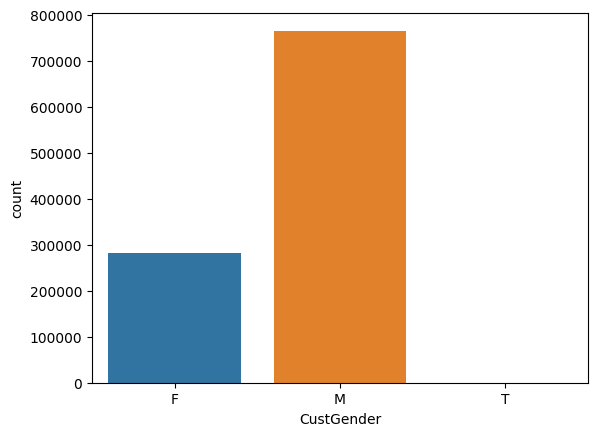

CustLocation
MUMBAI                         103595
NEW DELHI                       84928
BANGALORE                       81555
GURGAON                         73818
DELHI                           71019
                                ...  
ROAD (E) THANE                      1
TO APOLO PHARMACY BANGALORE         1
PILLAR NO 725 NEW DELHI             1
COMPANY BANGALORE                   1
IMPERIA THANE WEST                  1
Name: count, Length: 9355, dtype: int64


In [208]:
# Counts of Categorical values?
sns.countplot(data=bank_eda,x='CustGender')
plt.show()

print(bank_eda['CustLocation'].value_counts())

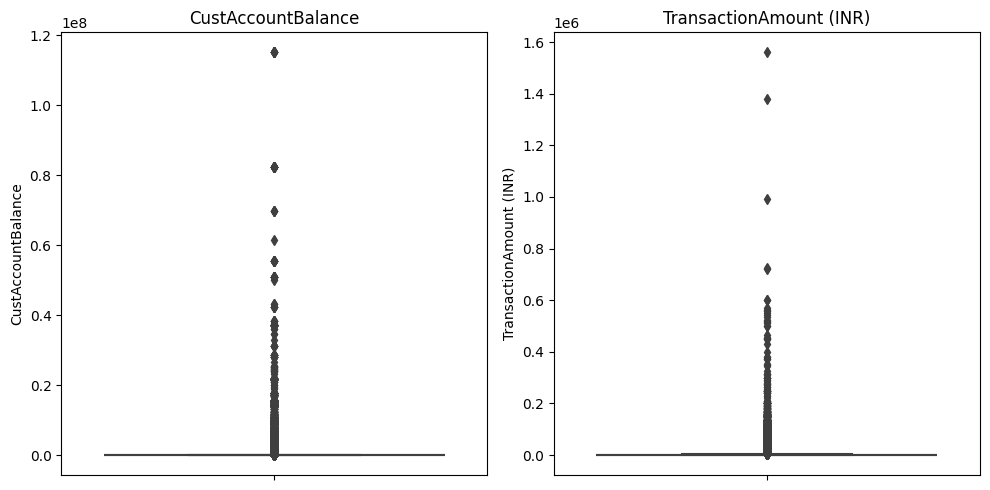

In [209]:
num_columns = ['CustAccountBalance','TransactionAmount (INR)']
# Create subplots
fig, axes = plt.subplots(1, len(num_columns), figsize=(10, 5))

# Loop through each column and create a boxplot
for i, col in enumerate(num_columns):
    sns.boxplot(data=bank_eda, y=col, ax=axes[i])
    axes[i].set_title(col)  # Set title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

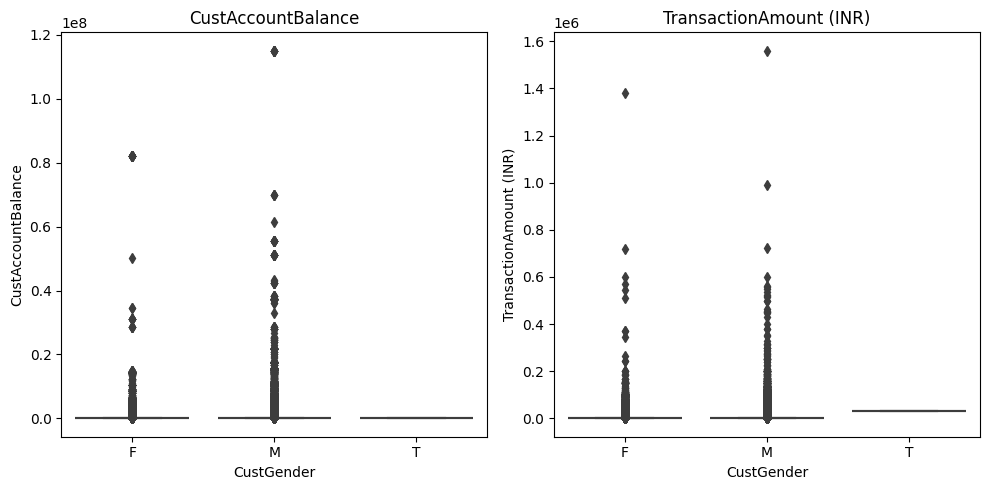

In [210]:
# Boxplot of Account Balance and Transaction Amount by Gender
# Create subplots
fig, axes = plt.subplots(1, len(num_columns), figsize=(10, 5))
# Loop through each column and create a boxplot for each gender
for i, col in enumerate(num_columns):
    sns.boxplot(data=bank_eda, x='CustGender', y=col, ax=axes[i])
    axes[i].set_title(col)  # Set title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [211]:
(bank_eda['CustLocation'].value_counts()).sort_values(ascending=False).iloc[:10]

CustLocation
MUMBAI       103595
NEW DELHI     84928
BANGALORE     81555
GURGAON       73818
DELHI         71019
NOIDA         32784
CHENNAI       30009
PUNE          25851
HYDERABAD     23049
THANE         21505
Name: count, dtype: int64

### Year of Transaction and Customer Age as per Transaction Year

In [212]:
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [213]:
from datetime import datetime,date

bank_eda['TransactionDate'] = pd.to_datetime(bank_eda['TransactionDate'],format='mixed')

In [214]:
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [215]:
# the code is adjusting dates in the 'TransactionDate' column by subtracting 100 years from any dates that are in the future relative to the current date
# and time. This adjustment may be necessary if there are dates in the future that were mistakenly recorded or need to be normalized for analysis
# purposes.
bank_eda['TransactionDate'] = bank_eda['TransactionDate'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)

In [216]:
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [217]:
bank_eda['TransactionYear'] = bank_eda['TransactionDate'].dt.year
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016


In [218]:
bank_eda['CustomerDOB'] = pd.to_datetime(bank_eda['CustomerDOB'],format='mixed')
bank_eda['CustomerDOB'] = bank_eda['CustomerDOB'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)
bank_eda['CustomerYear'] = bank_eda['CustomerDOB'].dt.year
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,1994.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,1957.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,1996.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,1973.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,1988.0


In [219]:
bank_eda['CustomerAge'] = bank_eda['TransactionYear'] - bank_eda['CustomerYear']
bank_eda.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerYear,CustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,1994.0,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,1957.0,59.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,1996.0,20.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,1973.0,43.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,1988.0,28.0


In [220]:
## Drop the column 'CustomerDOB'  and 'CustomerYear'
bank_eda.drop('CustomerDOB',axis=1,inplace=True)
bank_eda.drop('CustomerYear',axis=1,inplace=True)

In [221]:
# this below code output are Outliers!?
bank_eda[bank_eda.CustomerAge > 200]

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
16,T17,C1376215,M,MUMBAI,77495.15,2016-01-08,124727,1423.11,2016,216.0
22,T23,C7018081,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,104718,110.00,2016,216.0
28,T29,C7935438,M,MOHALI,969436.12,2016-03-08,183634,36.90,2016,216.0
35,T36,C1211387,M,AHMEDABAD,11791.25,2016-03-08,125915,1075.00,2016,216.0
151,T152,C3334638,M,PUNE,700.00,2016-09-08,24912,1500.00,2016,216.0
...,...,...,...,...,...,...,...,...,...,...
1048443,T1048444,C7261226,M,BHILAI,1393.33,2016-09-18,102427,200.00,2016,216.0
1048452,T1048453,C3813481,M,NEW DELHI,984605.24,2016-09-18,84644,219.00,2016,216.0
1048531,T1048532,C6937679,M,NEW DELHI,50698.90,2016-09-18,184319,598.86,2016,216.0
1048533,T1048534,C7431884,M,MANDIR DHANBAD,53771.64,2016-09-18,184049,520.00,2016,216.0


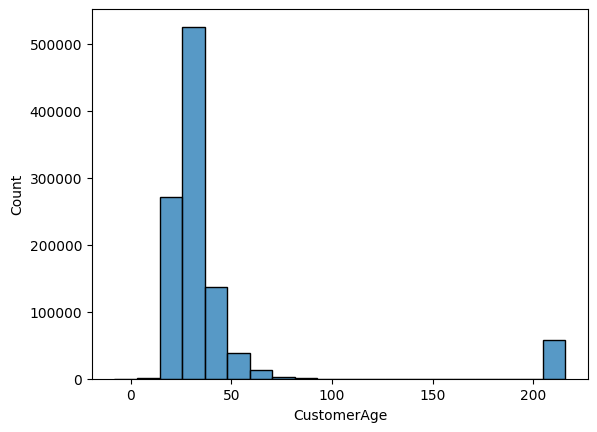

In [222]:
#### Looks like there are Outliers
sns.histplot(data=bank_eda,x='CustomerAge',bins=20)
plt.show()

In [223]:
# Removed the outliers
bank_clean = bank_eda[bank_eda.CustomerAge < 100]
bank_clean

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,22.0
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,59.0
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,20.0
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,43.0
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,28.0
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,2016,26.0
1048563,T1048564,C6459278,M,NASHIK,27311.42,2016-09-18,183734,460.0,2016,24.0
1048564,T1048565,C6412354,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,2016,27.0
1048565,T1048566,C6420483,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,2016,38.0


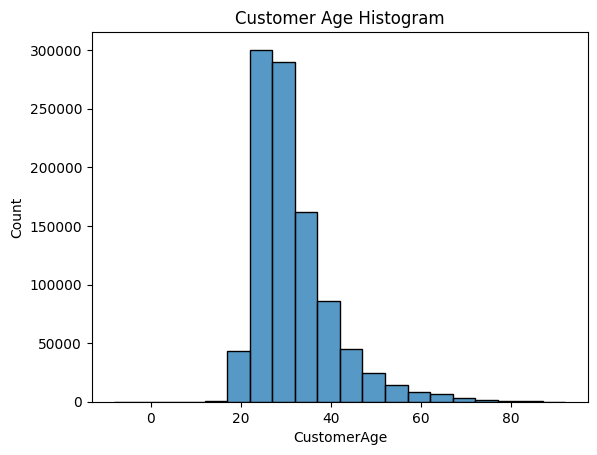

In [224]:
sns.histplot(data=bank_clean,x='CustomerAge',bins=20)
plt.title('Customer Age Histogram')
plt.show()

In [225]:
# Majority customers are in the age group of 20-40
bank_clean.isna().sum()

TransactionID                 0
CustomerID                    0
CustGender                  164
CustLocation                151
CustAccountBalance         2194
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
TransactionYear               0
CustomerAge                   0
dtype: int64

In [226]:
# Checking if Account Balance > Transaction Amount
bank_clean[(bank_clean['CustAccountBalance'] - bank_clean['TransactionAmount (INR)'])<0]

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,141858,27999.00,2016,59.0
26,T27,C5430368,M,DELHI,285.76,2016-03-08,160537,5500.00,2016,30.0
34,T35,C7017047,M,GURGAON,39.73,2016-03-08,182715,110.00,2016,39.0
36,T37,C4320949,F,CHENNAI,213.06,2016-03-08,182915,1081.00,2016,32.0
46,T47,C8934588,M,JAIPUR,5055.18,2016-03-08,223146,13846.00,2016,35.0
...,...,...,...,...,...,...,...,...,...,...
1048537,T1048538,C9016563,M,SHILLLONG,1002.96,2016-09-18,183747,1146.65,2016,29.0
1048538,T1048539,C3319123,M,DELHI,200.62,2016-09-18,183920,401.20,2016,37.0
1048542,T1048543,C6210667,M,MALDA,6.42,2016-09-18,182855,800.00,2016,27.0
1048560,T1048561,C5028150,M,PUNE,464.87,2016-09-18,184632,3000.00,2016,36.0


In [227]:
# Checking if Account Balance > Transaction Amount
bank_clean['less_then_0'] = (bank_clean['CustAccountBalance'] - bank_clean['TransactionAmount (INR)']) < 0
bank_clean['less_then_0'] = bank_clean['less_then_0'].astype(int)
bank_clean

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,less_then_0
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,22.0,0
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,59.0,1
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,20.0,0
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,43.0,0
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,2016,26.0,0
1048563,T1048564,C6459278,M,NASHIK,27311.42,2016-09-18,183734,460.0,2016,24.0,0
1048564,T1048565,C6412354,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,2016,27.0,0
1048565,T1048566,C6420483,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,2016,38.0,0


In [228]:
bank_clean.drop('less_then_0',axis=1,inplace=True)

In [229]:
bank_clean.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,22.0
1,T2,C2142763,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2016,59.0
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,20.0
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,43.0
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,28.0


In [230]:
bank_clean_2 = bank_clean[(bank_clean['CustAccountBalance'] - bank_clean['TransactionAmount (INR)'])>0]
bank_clean_2

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,22.0
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,20.0
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,43.0
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,28.0
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,173940,676.0,2016,44.0
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,2016,26.0
1048563,T1048564,C6459278,M,NASHIK,27311.42,2016-09-18,183734,460.0,2016,24.0
1048564,T1048565,C6412354,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,2016,27.0
1048565,T1048566,C6420483,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,2016,38.0


In [231]:
bank_clean_2.isna().sum()

TransactionID                0
CustomerID                   0
CustGender                 135
CustLocation               140
CustAccountBalance           0
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
TransactionYear              0
CustomerAge                  0
dtype: int64

In [232]:
bank_clean_2['CustGender'].fillna('M',inplace=True)
bank_clean_2['CustLocation'].fillna('MUMBAI',inplace=True)

In [233]:
bank_clean_2.isna().sum()

TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
TransactionYear            0
CustomerAge                0
dtype: int64

### Transactions Amount and Transaction Count by Month -2016

In [234]:
### Transactions Amount and Transaction Count by Month -2016
bank_clean_2['TransactionMonth'] = bank_clean_2['TransactionDate'].dt.month
bank_clean_2.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionMonth
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,22.0,2
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,20.0,2
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,43.0,2
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,28.0,2
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,173940,676.0,2016,44.0,2


In [235]:
transactions_num = bank_clean_2[['TransactionAmount (INR)','TransactionMonth']]
transactions_num

,TransactionAmount (INR),TransactionMonth
0,25.0,2
2,459.0,2
3,2060.0,2
4,1762.5,2
5,676.0,2
...,...,...
1048562,799.0,9
1048563,460.0,9
1048564,770.0,9
1048565,1000.0,9


In [236]:
monthly_transactions = transactions_num.groupby('TransactionMonth').agg(['median','count'])
monthly_transactions

TransactionAmount (INR)        
                                  median   count
TransactionMonth                                
1                                384.000   36129
2                                400.000   36994
3                                477.975   40108
4                                500.000   40644
5                                415.000   36124
6                                454.000   39217
7                                480.000   41656
8                                400.000  362838
9                                378.000  135155
10                               433.000   43455
11                               465.000   40296
12                               396.650   36204

TransactionMonth: This column represents the months of the year.

Median Transaction Amount: This column shows the median transaction amount (in INR) for each month. The median is the middle value of the sorted transaction amounts for a particular month. It provides a measure of the central tendency of the transaction amounts, which is less influenced by extreme values compared to the mean.

Count of Transactions: This column displays the total count of transactions for each month. It indicates the number of transactions that occurred during that month.

### Median Transaction Amount by Month

#### Interpretation:

Transaction Amount Trend: Looking at the median transaction amount, we can observe fluctuations throughout the year. For instance, in January, the median transaction amount is 384 INR, while it increases to 500 INR in April before decreasing again in subsequent months. This trend suggests variations in transaction behavior over the months.

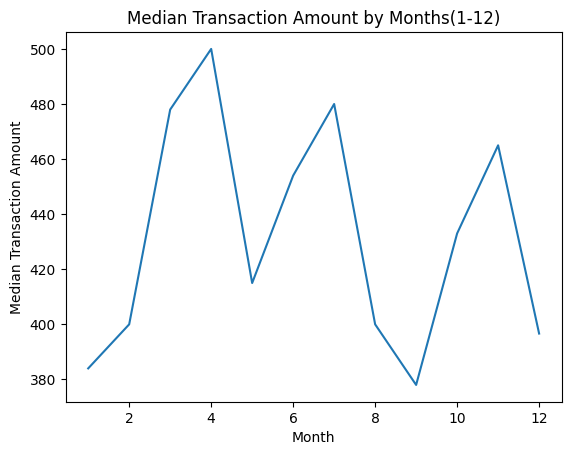

In [237]:
monthly_transactions['TransactionAmount (INR)','median'].plot(kind='line')
plt.title('Median Transaction Amount by Months(1-12)')
plt.xlabel('Month')
plt.ylabel('Median Transaction Amount')
plt.show()

### Number of Transactions by Month

#### Interpretation:
Transaction Volume: The count of transactions provides insights into the volume of transactions during each month. For example, August has a significantly higher transaction count compared to other months, indicating a peak in transaction activity during that period.

#### Insights:

Seasonal Variation: The fluctuations in median transaction amount and transaction count across different months suggest the presence of seasonal patterns in customer spending behavior. Analyzing these patterns can help in identifying peak periods and planning targeted marketing or promotional campaigns accordingly.

Monthly Performance Analysis: By comparing transaction metrics across different months, businesses can assess monthly performance, identify trends, and make informed decisions to optimize operations and enhance customer satisfaction.

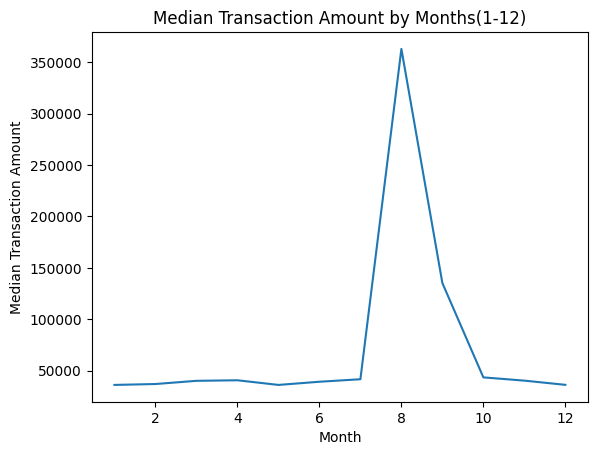

In [238]:
monthly_transactions['TransactionAmount (INR)','count'].plot(kind='line')
plt.title('Median Transaction Amount by Months(1-12)')
plt.xlabel('Month')
plt.ylabel('Median Transaction Amount')
plt.show()

### Transactions by Time of Day

In [239]:
bank_clean_2.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionMonth
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2016,22.0,2
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2016,20.0,2
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2016,43.0,2
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2016,28.0,2
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,173940,676.0,2016,44.0,2


In [240]:
from datetime import datetime
# bank_clean_2['TransactionTime'] = bank_clean_2['TransactionTime'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))
# bank_clean_2['TransactionTime'] = bank_clean_2['TransactionTime'].apply(lambda x: datetime.strptime(str(x), '%H:%M:%S').strftime('%H:%M:%S'))
bank_clean_2['TransactionTime'] = bank_clean_2['TransactionTime'].apply(lambda x: str(x).zfill(6))  # Pad with leading zeros if necessary
bank_clean_2['TransactionTime'] = bank_clean_2['TransactionTime'].apply(lambda x: datetime.strptime(x, '%H%M%S').strftime('%H:%M:%S'))



In [241]:
bank_clean_2.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionMonth
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,2016,22.0,2
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,2016,20.0,2
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,2016,43.0,2
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,2016,28.0,2
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,17:39:40,676.0,2016,44.0,2


In [243]:
time_split = bank_clean_2['TransactionTime'].str.split(':',expand=True)
bank_clean_2['TransactionHour'] = time_split[0].astype(int)
bank_clean_2.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionMonth,TransactionHour
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,2016,22.0,2,14
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,2016,20.0,2,14
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,2016,43.0,2,14
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,2016,28.0,2,18
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,17:39:40,676.0,2016,44.0,2,17


In [244]:
transactions_num_2 = bank_clean_2[['TransactionAmount (INR)','TransactionHour']]

hourly_transactions = transactions_num_2.groupby('TransactionHour').agg(['median','count'])
hourly_transactions

TransactionAmount (INR)       
                                 median  count
TransactionHour                               
0                                 300.0  15084
1                                 251.0   7364
2                                 200.0   4611
3                                 175.0   3951
4                                 150.0   3820
5                                 150.0   4491
6                                 199.0   7013
7                                 200.0  12472
8                                 229.0  20232
9                                 250.0  28251
10                                275.0  35838
11                                340.0  43479
12                                410.0  50703
13                                445.0  54420
14                                471.0  55901
15                                500.0  54295
16                                500.0  53968
17                                500.0  58299
18                                500.0  67645
19                                500.0  81476
20                                499.0  83618
21                                449.0  68939
22                                365.0  45941
23                                360.0  27009

### Median Transaction Amount by Time of Day

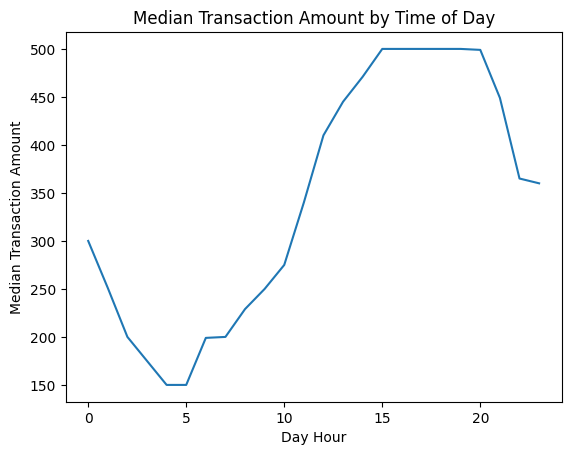

In [245]:
hourly_transactions['TransactionAmount (INR)','median'].plot(kind='line')
plt.title('Median Transaction Amount by Time of Day')
plt.xlabel('Day Hour')
plt.ylabel('Median Transaction Amount')
plt.show()

### Number of Transactions by Time of Day

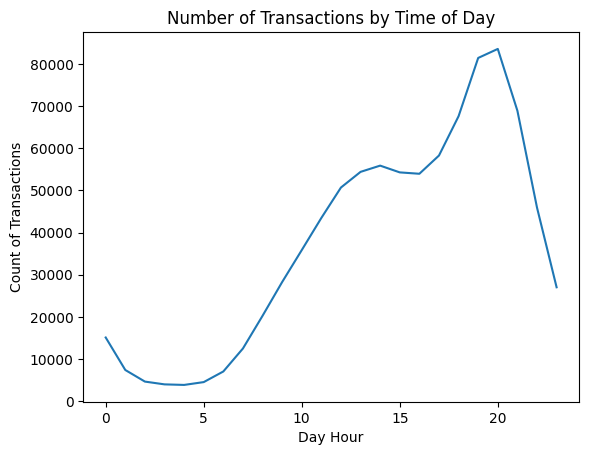

In [246]:
hourly_transactions['TransactionAmount (INR)','count'].plot(kind='line')
plt.title('Number of Transactions by Time of Day')
plt.xlabel('Day Hour')
plt.ylabel('Count of Transactions')
plt.show()

TransactionHour: This column represents the hours of the day in a 24-hour format.

Median Transaction Amount: This column shows the median transaction amount (in INR) for each hour of the day. The median is the middle value of the sorted transaction amounts for a particular hour. It provides a measure of the central tendency of the transaction amounts, which is less influenced by extreme values compared to the mean.

Count of Transactions: This column displays the total count of transactions for each hour of the day. It indicates the number of transactions that occurred during that hour.

#### Interpretation:

Transaction Amount Trend: Looking at the median transaction amount, we can observe fluctuations throughout the day. For example, transaction amounts are lower during the early hours of the morning (e.g., 1 AM, 2 AM) and gradually increase during the day, peaking during the evening hours (e.g., 6 PM, 7 PM, 8 PM). This trend suggests variations in transaction amounts based on the time of day.

Transaction Volume: The count of transactions provides insights into the volume of transactions during each hour of the day. For instance, there is a significant increase in transaction volume during the evening hours (e.g., 7 PM, 8 PM, 9 PM), indicating peak transaction activity during that time period.

#### Insights:

Peak Transaction Hours: By analyzing the count of transactions, we can identify peak hours of transaction activity. For example, the data suggests that transaction volume tends to be highest during the evening hours, particularly between 7 PM and 9 PM. Businesses can leverage this information to optimize staffing, resources, and marketing efforts during peak hours.

Transaction Amount Variation: Understanding the variation in transaction amounts throughout the day can help businesses tailor their pricing strategies, promotions, and product offerings to align with customer behavior and preferences during different times of the day.

### Transactions by Month and Time of Day

In [247]:
transactions_3 = bank_clean_2[['TransactionAmount (INR)','TransactionMonth','TransactionHour']]

monthly_and_hourly = transactions_3.groupby(['TransactionMonth','TransactionHour']).agg(['median','count'])
monthly_and_hourly

TransactionAmount (INR)      
                                                  median count
TransactionMonth TransactionHour                              
1                0                                 350.0   443
                 1                                 246.0   215
                 2                                 211.5   214
                 3                                 109.0   169
                 4                                 200.0   169
...                                                  ...   ...
12               19                                491.0  3240
                 20                                474.0  3277
                 21                                420.0  2791
                 22                                373.0  1869
                 23                                401.0  1219

[288 rows x 2 columns]

TransactionMonth: This column represents the months of the year.

TransactionHour: This column represents the hours of the day in a 24-hour format.

Median Transaction Amount: This column shows the median transaction amount (in INR) for each combination of month and hour. The median is the middle value of the sorted transaction amounts for a particular combination of month and hour. It provides a measure of the central tendency of the transaction amounts, which is less influenced by extreme values compared to the mean.

Count of Transactions: This column displays the total count of transactions for each combination of month and hour. It indicates the number of transactions that occurred during that month and hour.

#### Interpretation:

Transaction Amount Trend: By examining the median transaction amount, we can observe fluctuations throughout the year and across different hours of the day. For example, the median transaction amount varies from month to month and also exhibits variations within each month based on the hour of the day.

Transaction Volume: The count of transactions provides insights into the volume of transactions during each combination of month and hour. It helps identify peak hours of transaction activity for each month.

#### Insights:

Seasonal Transaction Patterns: Analyzing the transaction data based on both month and hour allows us to identify seasonal patterns in transaction behavior. For instance, transaction volume and median transaction amount may vary significantly between different months and hours, reflecting changes in consumer spending habits and preferences throughout the year.

Hourly Transaction Peaks: By examining the count of transactions for each combination of month and hour, businesses can identify peak hours of transaction activity for specific months. This information can be used to optimize staffing, resources, and marketing efforts to meet customer demand during peak periods.

In [248]:
monthly_and_hourly.index

MultiIndex([( 1,  0),
            ( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1,  6),
            ( 1,  7),
            ( 1,  8),
            ( 1,  9),
            ...
            (12, 14),
            (12, 15),
            (12, 16),
            (12, 17),
            (12, 18),
            (12, 19),
            (12, 20),
            (12, 21),
            (12, 22),
            (12, 23)],
           names=['TransactionMonth', 'TransactionHour'], length=288)

In [249]:
months = list(range(1,13))
hours = list(range(0,24))
months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Median Transaction Amount in Every Month and Time of Day

In [255]:
for i, month in enumerate(months):
    print(i)
    # print(month)

0
1
2
3
4
5
6
7
8
9
10
11


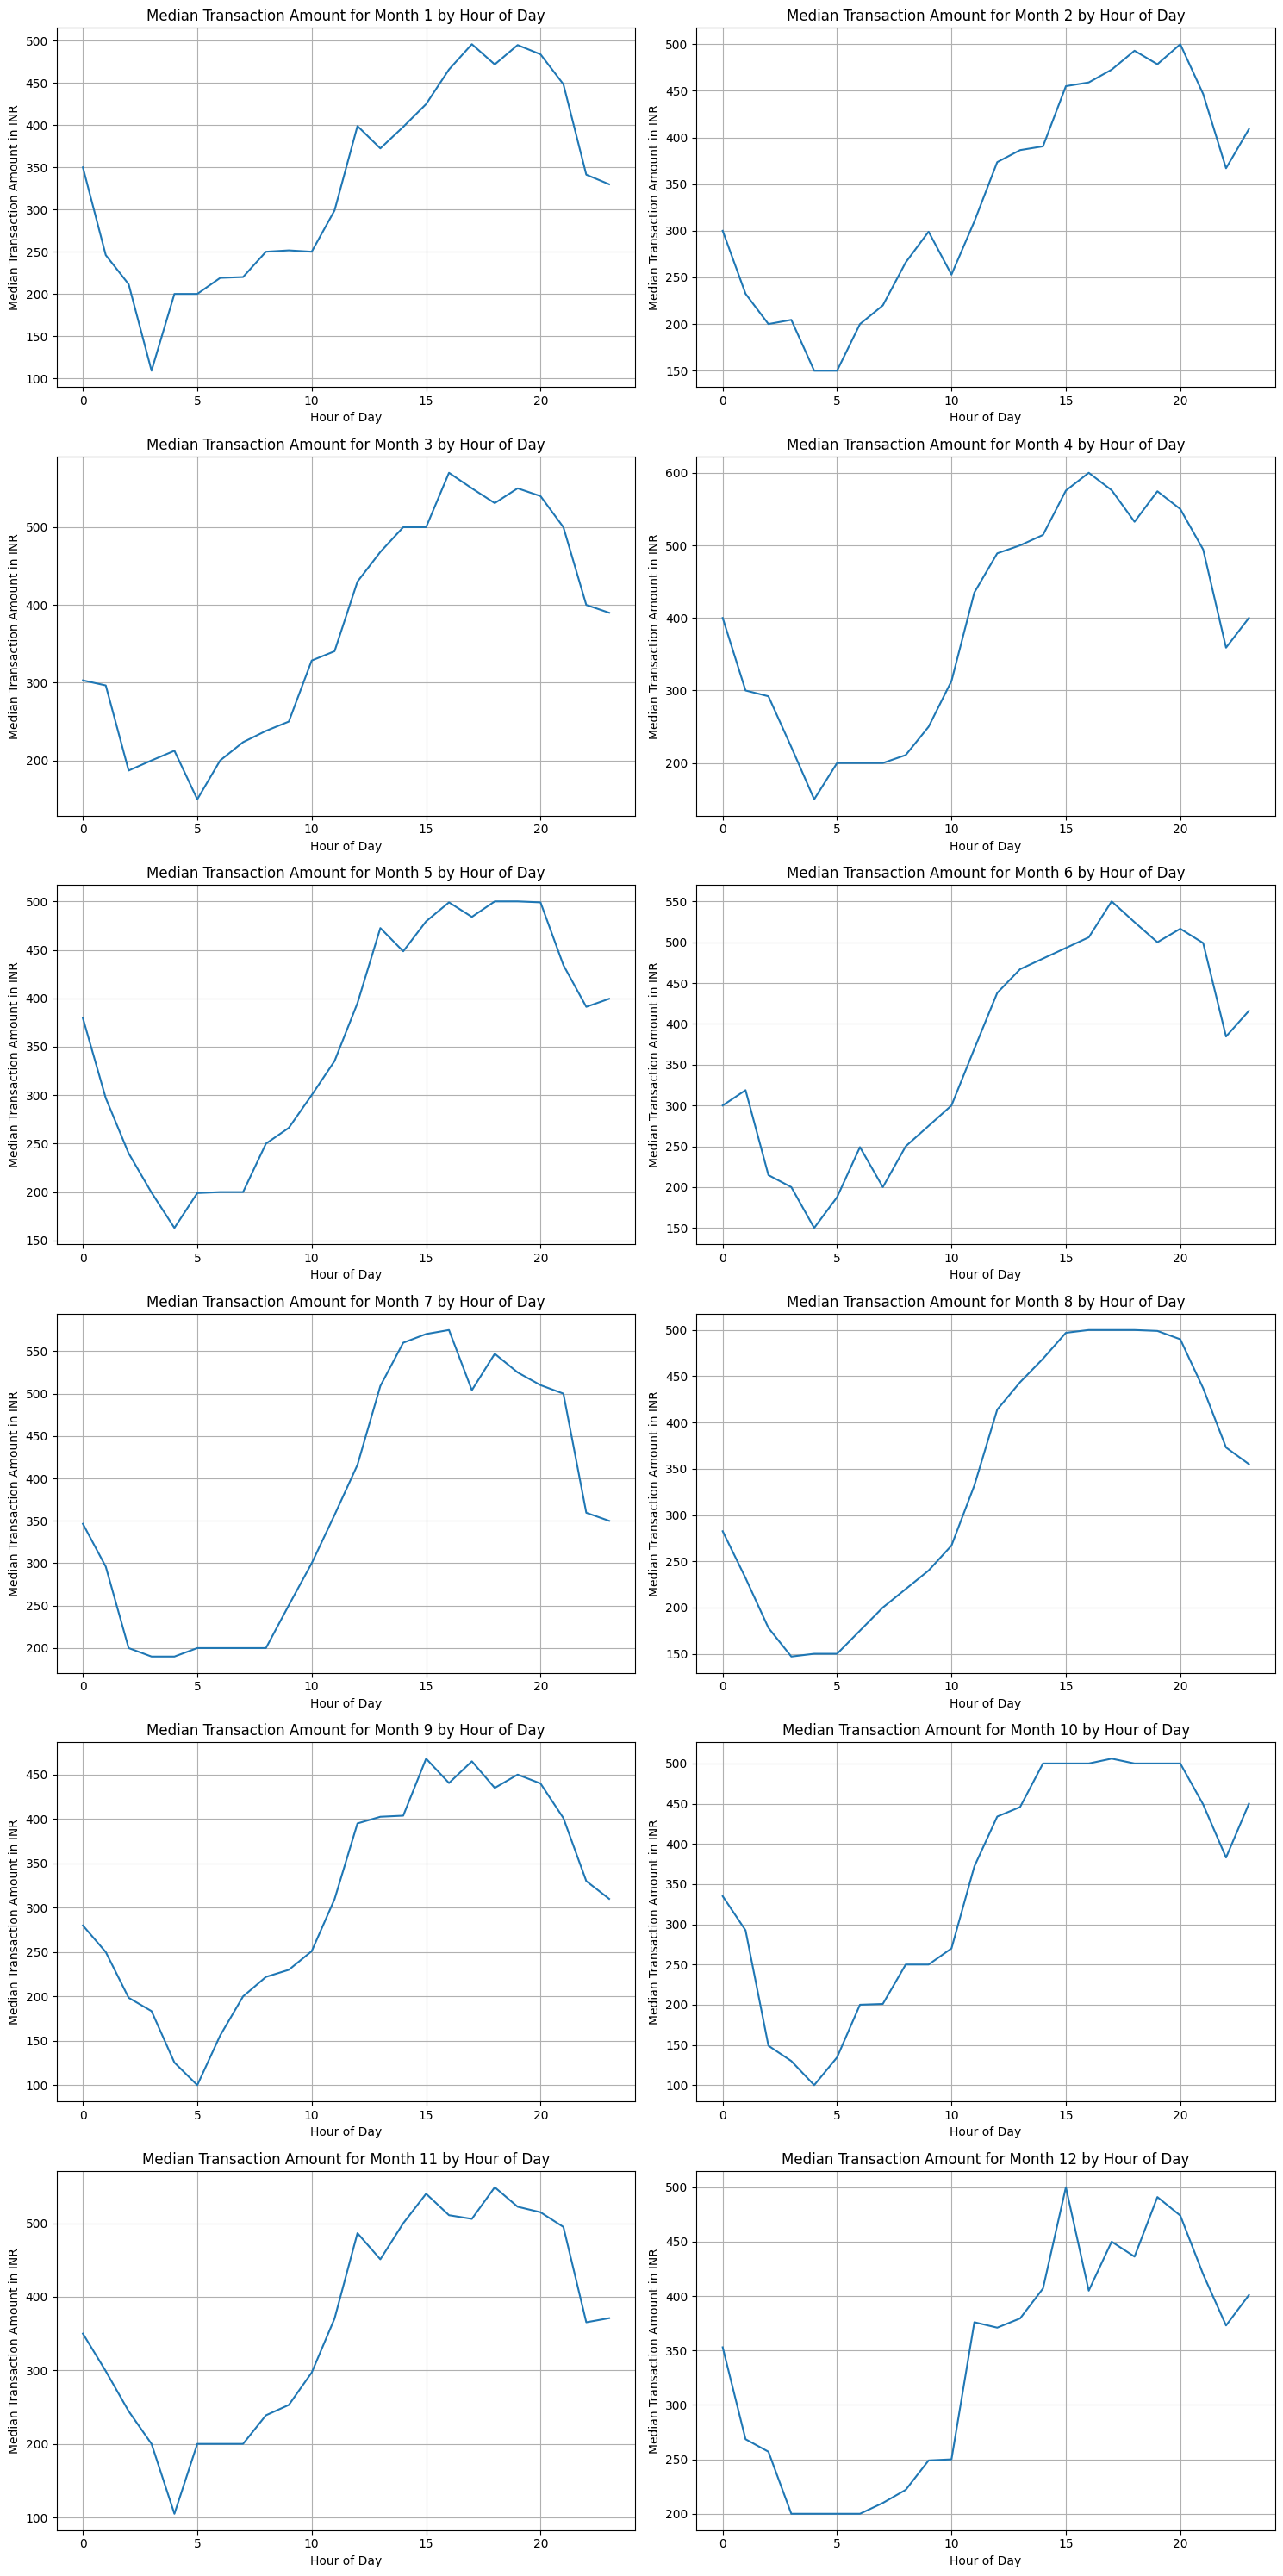

In [258]:
import matplotlib.pyplot as plt

# Calculate the number of columns needed based on the number of months
num_months = len(months)
num_cols = 2  # Set the number of columns per row
num_rows = (num_months + num_cols - 1) // num_cols  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iterate over each month
for i, month in enumerate(months):
    # Select data for the current month
    mini_month = monthly_and_hourly.loc[month]
    
    # Calculate the row and column indices for the subplot
    row_index = i // num_cols
    col_index = i % num_cols
    
    # Plot median transaction amount for the current month
    mini_month['TransactionAmount (INR)', 'median'].plot(ax=axes[row_index, col_index], kind='line', legend=False)
    
    # Set title, labels, and adjust layout for the subplot
    axes[row_index, col_index].set_title(f'Median Transaction Amount for Month {month} by Hour of Day')
    axes[row_index, col_index].set_xlabel('Hour of Day')
    axes[row_index, col_index].set_ylabel('Median Transaction Amount in INR')
    axes[row_index, col_index].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### Number of Transactions for Every Month and Time of Day

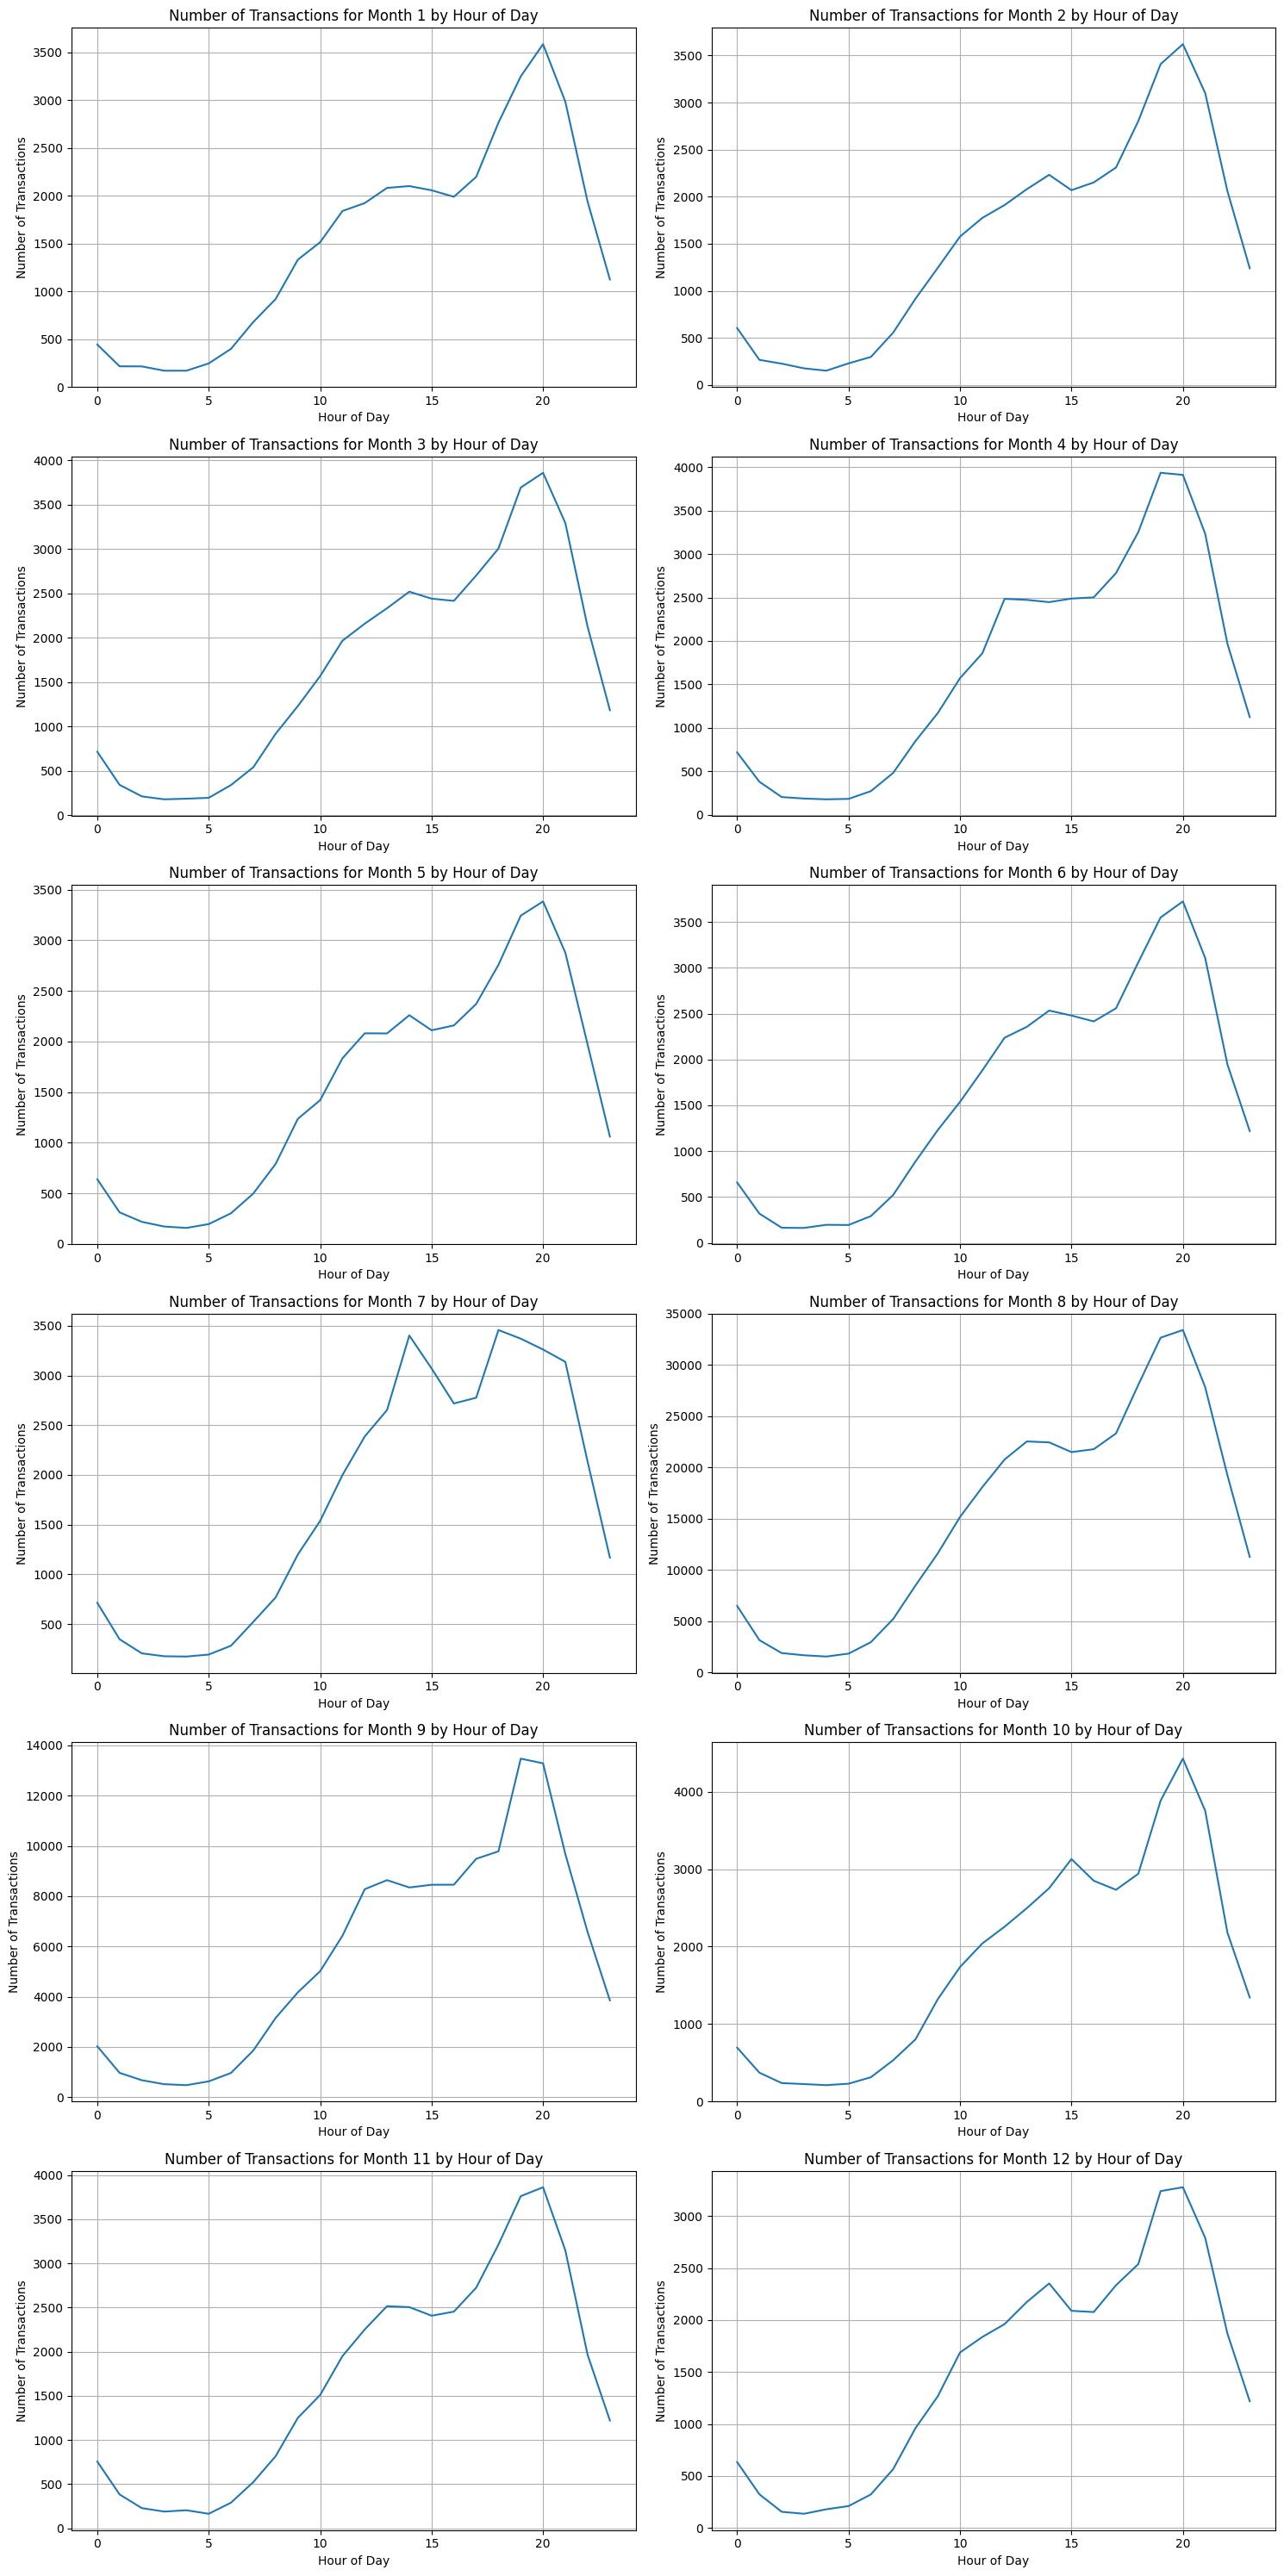

In [259]:
import matplotlib.pyplot as plt

# Calculate the number of columns needed based on the number of months
num_months = len(months)
num_cols = 2  # Set the number of columns per row
num_rows = (num_months + num_cols - 1) // num_cols  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Iterate over each month
for i, month in enumerate(months):
    # Select data for the current month
    mini_month = monthly_and_hourly.loc[month]
    
    # Calculate the row and column indices for the subplot
    row_index = i // num_cols
    col_index = i % num_cols
    
    # Plot number of transactions for the current month
    mini_month['TransactionAmount (INR)', 'count'].plot(ax=axes[row_index, col_index], kind='line', legend=False)
    
    # Set title, labels, and adjust layout for the subplot
    axes[row_index, col_index].set_title(f'Number of Transactions for Month {month} by Hour of Day')
    axes[row_index, col_index].set_xlabel('Hour of Day')
    axes[row_index, col_index].set_ylabel('Number of Transactions')
    axes[row_index, col_index].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### Correlation between Numerical Features

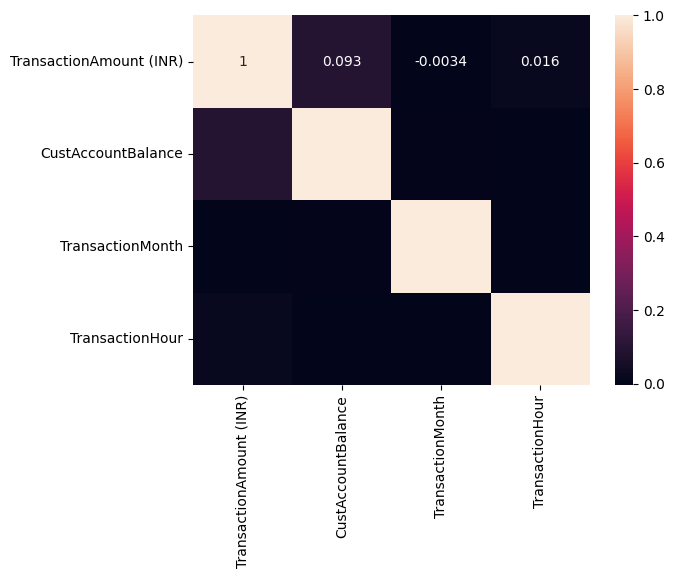

In [260]:
transactions_corr = bank_clean_2[['TransactionAmount (INR)','CustAccountBalance','TransactionMonth','TransactionHour']]

corr_mat = transactions_corr.corr()

sns.heatmap(corr_mat,annot=True)
plt.show()

### Principal Component Analysis

In [265]:
bank = bank_clean_2.copy()
bank.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionYear,CustomerAge,TransactionMonth,TransactionHour
0,T1,C5841053,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,2016,22.0,2,14
2,T3,C4417068,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,2016,20.0,2,14
3,T4,C5342380,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,2016,43.0,2,14
4,T5,C9031234,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,2016,28.0,2,18
5,T6,C1536588,F,ITANAGAR,53609.20,2016-02-08,17:39:40,676.0,2016,44.0,2,17


In [266]:
bank.drop(['TransactionID','CustomerID','CustLocation','TransactionDate','TransactionTime','TransactionYear'],axis=1,inplace=True)
bank.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionMonth,TransactionHour
0,F,17819.05,25.0,22.0,2,14
2,F,17874.44,459.0,20.0,2,14
3,F,866503.21,2060.0,43.0,2,14
4,F,6714.43,1762.5,28.0,2,18
5,F,53609.20,676.0,44.0,2,17


In [267]:
bank.drop(['TransactionMonth','TransactionHour'],axis=1,inplace=True)
bank.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,F,17819.05,25.0,22.0
2,F,17874.44,459.0,20.0
3,F,866503.21,2060.0,43.0
4,F,6714.43,1762.5,28.0
5,F,53609.20,676.0,44.0


In [268]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())
num_attribs = ['CustAccountBalance','TransactionAmount (INR)','CustomerAge']
cat_attribs = ['CustGender']
preprocessing = ColumnTransformer([
    ('num',num_pipeline,num_attribs),('cat',cat_pipeline,cat_attribs)
])

In [270]:
bank_df = preprocessing.fit_transform(bank)
bank_df

array([[-0.11584121, -0.28179154, -1.04168371,  1.        ,  0.        ],
       [-0.11577684, -0.18363003, -1.26877193,  1.        ,  0.        ],
       [ 0.87055408,  0.17848188,  1.34274256,  1.        ,  0.        ],
       ...,
       [ 0.12118865, -0.11328849, -0.47396317,  0.        ,  1.        ],
       [-0.12479202, -0.06126742,  0.77502202,  0.        ,  1.        ],
       [-0.04852825, -0.02372177,  0.09375737,  0.        ,  1.        ]])

In [271]:
print('Shape of Bank data before PCA:',bank_df.shape)

Shape of Bank data before PCA: (888820, 5)


In [272]:
from sklearn.decomposition import TruncatedSVD

pca_bank = TruncatedSVD(n_components=4)
pca_bank.fit(bank_df)

bank_transformed = pca_bank.transform(bank_df)
print('Shape of Bank data after PCA:',bank_transformed.shape)

Shape of Bank data after PCA: (888820, 4)


### Plot of Principal Component-2 vs Principal Component-1

In [274]:
bank_transformed[:,0]

array([-0.86718254, -0.95109077,  1.40016788, ..., -0.27350835,
        0.38326013,  0.02975246])

In [275]:
bank_transformed[:,1]

array([ 0.10616544,  0.03839095,  0.47307143, ...,  0.21459209,
       -0.00259293,  0.02845503])

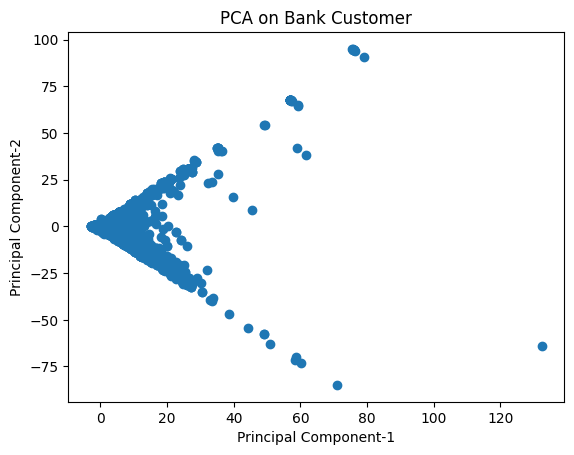

In [273]:
plt.scatter(bank_transformed[:,0],bank_transformed[:,1])
plt.title('PCA on Bank Customer')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

In [276]:
from sklearn.cluster import KMeans

cluster = list(range(1,21))
inertias = []
for clusters in cluster:
    kmeans_bank = KMeans(n_clusters=clusters,n_init='auto',random_state=42)
    kmeans_bank.fit(bank_transformed)
    inertias.append(kmeans_bank.inertia_)

### Knee-Elbow Plot

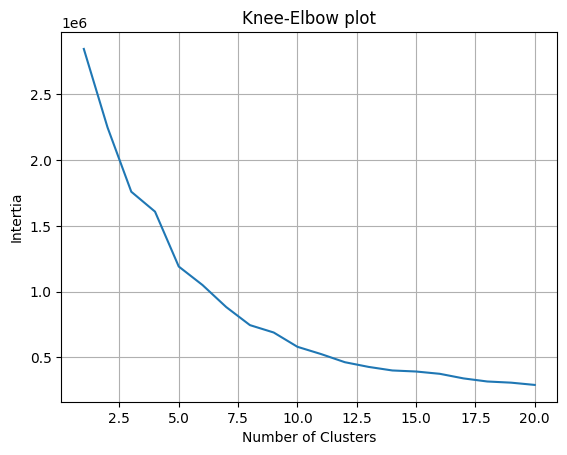

In [277]:
plt.plot(cluster,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.title('Knee-Elbow plot')
plt.grid()
plt.show()

### Principal Components Plot with Labels

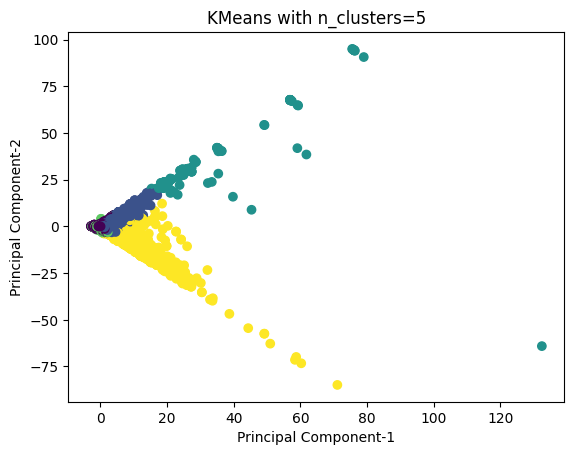

In [279]:
kmeans_chosen = KMeans(n_clusters=5,n_init='auto',random_state=42)
kmeans_chosen.fit(bank_transformed)

plt.scatter(bank_transformed[:,0],bank_transformed[:,1],c=kmeans_chosen.labels_)
plt.title('KMeans with n_clusters=5')
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

In [280]:
bank['Labels'] = kmeans_chosen.labels_

In [281]:
bank['Labels'].value_counts()

Labels
0    516621
3    212190
1    155375
4      4469
2       165
Name: count, dtype: int64

### Summary Statistics of Clusters

In [282]:
labels = [0,1,2,3,4]
for label in labels:
    print(f'Cluster no:{label}')
    df_cluster = bank[bank.Labels == label]
    mode_gender = df_cluster['CustGender'].mode()
    mean_accountbalance = df_cluster['CustAccountBalance'].mean()
    mean_transaction_amt = df_cluster['TransactionAmount (INR)'].mean()
    mean_customer_age = df_cluster['CustomerAge'].mean()
    print(f'Most frequent gender:{mode_gender}')
    print(f'Mean Account Balance:{round(mean_accountbalance)}')
    print(f'Mean Transaction Amount (INR):{round(mean_transaction_amt)}')
    print(f'Mean Customer Age:{round(mean_customer_age)}')

Cluster no:0
Most frequent gender:0    M
Name: CustGender, dtype: object
Mean Account Balance:64519
Mean Transaction Amount (INR):809
Mean Customer Age:28
Cluster no:1
Most frequent gender:0    M
Name: CustGender, dtype: object
Mean Account Balance:296607
Mean Transaction Amount (INR):1859
Mean Customer Age:46
Cluster no:2
Most frequent gender:0    M
Name: CustGender, dtype: object
Mean Account Balance:47090776
Mean Transaction Amount (INR):12022
Mean Customer Age:59
Cluster no:3
Most frequent gender:0    F
Name: CustGender, dtype: object
Mean Account Balance:68882
Mean Transaction Amount (INR):1032
Mean Customer Age:28
Cluster no:4
Most frequent gender:0    M
Name: CustGender, dtype: object
Mean Account Balance:586781
Mean Transaction Amount (INR):45170
Mean Customer Age:38


Cluster 0 : Middle Aged Males who are probably working professionals

Cluster 1: Senior Males who are well established with a high Account Balance

Cluster 2: Single Males who are starting out their careers with a relatively low Bank Balance and Transaction Amount

Cluster 3: Similar characteristics to Cluster 0

Cluster 4: Simialr characteristics to Cluster 0